### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Import Dataset

In [2]:
df = pd.read_csv("assignment_raw_data.csv")
df.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
702,1005444,R3453589,11200.0,2018-04-05,2018-05-28
1646,1005488,J1822390,20000.0,2019-11-21,2019-12-17
282,1004886,G4822287,20000.0,2017-06-30,2017-08-18
724,1005435,J1822390,21000.0,2018-05-31,2018-07-09
1221,1005429,G4822287,20000.0,2018-12-11,2019-02-22


**Data Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                1850 non-null   int64  
 1   Product ID              1822 non-null   object 
 2   Amount (kg)             1816 non-null   float64
 3   Order Confirm Date      1837 non-null   object 
 4   Required Delivery Date  1828 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 72.4+ KB


**Amount by Product ID**

In [4]:
df.groupby("Product ID")["Amount (kg)"].agg(["mean", "min", "max", "count"])

,mean,min,max,count
Product ID,,,,
A2227186,740.000000,740.00,740.0,1
B9118928,16726.054457,5000.00,22000.0,92
C3338689,956.000000,956.00,956.0,3
D3831499,18929.411765,5000.00,22000.0,51
E0668189,3640.681818,850.00,5000.0,22
F7782086,17540.384615,5750.00,20300.0,26
G4822287,19851.851852,10000.00,22000.0,270
H1224922,20261.345361,5200.00,21501.0,194
J1822390,20036.144666,1400.00,22000.0,643


### Fill Null Values

**Fill null values in Amount (kg) Column**

In [5]:
# Without Null Values
aa = df[~df["Amount (kg)"].isnull()]
aa.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
415,1004547,R3453589,21000.0,2017-04-13,2017-06-08
1203,1005465,J1822390,22000.0,2019-01-14,2019-01-25
265,1004553,R3453589,21000.0,2017-05-09,2017-05-29
1007,1005622,D3831499,22000.0,2018-07-30,2018-09-04
377,1005256,E0668189,4200.0,2017-07-06,2017-10-01


In [6]:
# With Null Values
an = df[df["Amount (kg)"].isnull()]
an.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
245,1004553,J1822390,NaN,2017-04-17,2017-05-23
34,1004886,F7782086,NaN,2017-04-10,2017-05-29
5,1006022,K3569889,NaN,NaN,2020-07-16
98,1004553,R3453589,NaN,2017-01-16,2017-03-07
32,1004812,J1822390,NaN,2017-02-27,2017-04-26


**Function to fill Null values by careful analysis of Product ID Column**

In [7]:
def product(x):
    if x == "K3569889":
        return 3934
    if x == "J1822390":
        return 20036
    if x == "E0668189":
        return 3640
    if x == "F7782086":
        return 17540
    if x == "R3453589":
        return 17293
    if x == "M1189088":
        return 11000
    if x == "G4822287":
        return 19851
    if x == "O0832497":
        return 16016
    
an["Amount (kg)"] = an["Product ID"].apply(product) 

**Combine both dataframes**

In [8]:
df1 = pd.concat([aa, an])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 0 to 1532
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                1850 non-null   int64  
 1   Product ID              1822 non-null   object 
 2   Amount (kg)             1850 non-null   float64
 3   Order Confirm Date      1837 non-null   object 
 4   Required Delivery Date  1828 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 86.7+ KB


**Fill Null Values of Product ID Column**

In [9]:
# Without Null Values
pn = df1[df1["Product ID"].isnull()]
pn.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
411,1004553,NaN,21001.0,2017-04-10,2017-05-03
572,1005429,NaN,20000.0,2018-01-09,2018-02-27
638,1004577,NaN,21000.0,2017-10-05,2017-12-01
412,1004547,NaN,21000.0,2017-04-13,2017-05-10
458,1004553,NaN,21000.0,2017-10-25,2017-12-11


In [10]:
# With Null Values
pnn = df1[~df1["Product ID"].isnull()]
pnn.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
1662,1006020,J1822390,20000.0,2020-03-26,2020-05-16
1578,1005495,B9118928,8500.0,2019-11-26,2019-12-13
1823,1006067,J1822390,20000.0,2020-02-04,2020-03-15
1035,1005431,J1822390,20000.0,2018-10-05,2018-11-14
534,1004558,J1822390,22000.0,2017-10-27,2017-12-06


**Function to fill null values after careful consideration of amount and order id column**

In [11]:
def amount(x):
    if x == 21000.0:
        return "R3453589"
    if x == 20000.0:
        return "G4822287"
    if x ==  19400.0:
        return "G4822287"
    if x == 22000.0:
        return "J1822390"
    if x == 21001.0:
        return "J1822390"
    if x == 12000.0:
        return "B9118928"
    if x == 3000.0:
        return "Q7123343"
    if x == 6000.0:
        return "Q7123343"
    
pn["Product ID"] = pn["Amount (kg)"].apply(amount)

**Combine both dataframes**

In [12]:
df2 = pd.concat([pn, pnn])
df2.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
280,1004886,G4822287,20000.0,2017-06-30,2017-08-28
1732,1005782,G4822287,20000.0,2019-05-22,2019-07-22
839,1005431,J1822390,20000.0,2018-09-05,2018-10-31
1188,1005446,J1822390,20000.0,2019-01-04,2019-02-19
769,1005446,J1822390,22000.0,2018-01-31,2018-04-17


**Convert Columns to Datetime Type**

In [13]:
df2["Order Confirm Date"] = pd.to_datetime(df2["Order Confirm Date"])
df2["Required Delivery Date"] = pd.to_datetime(df2["Required Delivery Date"])

**Fill Null values of Order Confirmation Date by using Required Delivery Date**

In [14]:
# With Null Values
df2a = df2[df2["Order Confirm Date"].isnull()]
df2a.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
6,1005969,J1822390,20036.0,NaT,2020-08-06
5,1006022,K3569889,3934.0,NaT,2020-07-16
1534,1006069,R3453589,21000.0,NaT,2020-03-03
760,1005507,R3453589,21000.0,NaT,2018-05-09
913,1005429,G4822287,20000.0,NaT,2018-09-17


In [15]:
# Without Null Values
df2b = df2[~df2["Order Confirm Date"].isnull()]
df2b.sample(5)

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
1158,1005446,J1822390,13000.0,2018-10-09,2018-11-14
796,1005516,Y6453589,1380.0,2018-02-07,2018-04-24
393,1004602,R3453589,11200.0,2017-08-07,2017-10-02
826,1005448,B9118928,20000.0,2018-08-16,2018-09-25
89,1004812,J1822390,21000.0,2017-05-19,2017-06-26


**Fill Null Values**

In [16]:
df2a["Order Confirm Date"] = df2a["Order Confirm Date"].fillna(df2a["Required Delivery Date"] - pd.DateOffset(days=46))

In [17]:
df3 = pd.concat([df2a, df2b])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 15 to 1532
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1850 non-null   int64         
 1   Product ID              1850 non-null   object        
 2   Amount (kg)             1850 non-null   float64       
 3   Order Confirm Date      1850 non-null   datetime64[ns]
 4   Required Delivery Date  1828 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 86.7+ KB


In [18]:
df3[df3["Required Delivery Date"].isnull()]

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
921,1005435,R3453589,21000.0,2018-06-25,NaT
2,1006067,J1822390,21000.0,2020-06-22,NaT
9,1005969,J1822390,20000.0,2020-06-29,NaT
79,1005256,E0668189,4200.0,2017-05-04,NaT
100,1004553,D3831499,21000.0,2017-01-16,NaT
118,1004553,R3453589,21000.0,2017-03-03,NaT
139,1004577,J1822390,21000.0,2017-01-19,NaT
157,1004886,G4822287,20000.0,2017-03-22,NaT
178,1004558,J1822390,21000.0,2017-01-09,NaT
202,1004886,G4822287,20000.0,2017-02-06,NaT


In [19]:
df3["Required Delivery Date"] = df3["Required Delivery Date"].fillna(df3["Order Confirm Date"]+ pd.DateOffset(days=46))

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 15 to 1532
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1850 non-null   int64         
 1   Product ID              1850 non-null   object        
 2   Amount (kg)             1850 non-null   float64       
 3   Order Confirm Date      1850 non-null   datetime64[ns]
 4   Required Delivery Date  1850 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 86.7+ KB


**Demand Lead Time Days**

In [21]:
df3['dlt_days'] = ((df3["Required Delivery Date"] - df3["Order Confirm Date"])/np.timedelta64(1, 'D'))

**Demand Lead Time Weeks**

In [22]:
df3['dlt_weeks'] = ((df3["Required Delivery Date"] - df3["Order Confirm Date"])/np.timedelta64(1, 'W')).round()

**Demand Lead Time Months**

In [23]:
df3['dlt_months'] = ((df3["Required Delivery Date"] - df3["Order Confirm Date"])/np.timedelta64(1, 'M')).round()

In [24]:
df3.describe()

,Order ID,Amount (kg),dlt_days,dlt_weeks,dlt_months
count,1.850000e+03,1850.000000,1850.000000,1850.000000,1850.000000
mean,1.005319e+06,17538.896800,46.532973,6.651892,1.544865
std,4.617121e+02,5823.217707,26.697153,3.835293,0.937984
min,1.004217e+06,458.000000,-312.000000,-45.000000,-10.000000
25%,1.004886e+06,20000.000000,34.000000,5.000000,1.000000
50%,1.005436e+06,20000.000000,45.500000,6.500000,1.500000
75%,1.005531e+06,21000.000000,56.000000,8.000000,2.000000
max,1.006069e+06,22400.000000,781.000000,112.000000,26.000000


**Delete Outliers**

In [25]:
df3 = df3[(df3["dlt_days"] != -312.0) & (df3["dlt_days"] != -9.0) & (df3["dlt_days"] != 781)]

**demand lead time in months as index and sum up the amount requested for each order.**

In [26]:
df3.groupby("dlt_months")["Amount (kg)"].agg(["sum"])

,sum
dlt_months,
0.0,988957.00
1.0,15934221.05
2.0,13781118.03
3.0,1633543.00
4.0,26120.00
5.0,21000.00


In [27]:
pie = df3.groupby("dlt_months")["Amount (kg)"].agg(["sum"]).reset_index()
pie.columns = ["Months", "Amount (kg)"]
pie["Percentage"] = (pie["Amount (kg)"] / pie["Amount (kg)"].sum())* 100
pie["Months"] = pie["Months"].astype("int")
pie

,Months,Amount (kg),Percentage
0,0,988957.00,3.053754
1,1,15934221.05,49.202536
2,2,13781118.03,42.554070
3,3,1633543.00,5.044141
4,4,26120.00,0.080655
5,5,21000.00,0.064845


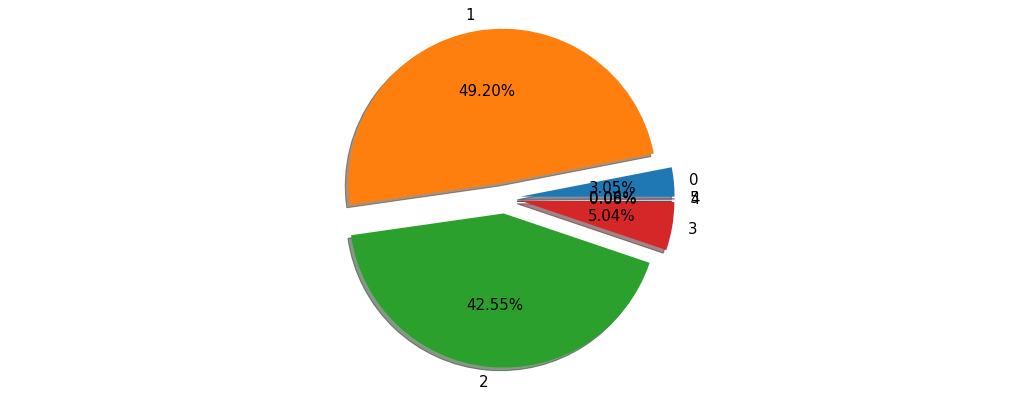

In [41]:
plt.figure(figsize = (18, 7))
plt.pie(pie["Percentage"], labels = pie["Months"], shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%', textprops={'fontsize': 15})
plt.axis('equal')
plt.savefig("fig.png")
plt.show()

### Prepare Dataset

In [29]:
data = pd.DataFrame({"Months": np.arange(1, 26),
                     "Demand": [100, 112, 107, 103, 91, 85, 84, 85, 79, 81, 134, 86, 99, 89, 111, 114, 118, 163, 193, 99, 144, 202, 158, 160, 144],
                     "Advanced Demand": [71, 30, 75, 64, 41, 51, 42, 51, 57, 49, 134, 52, 99, 56, 81, 79, 73, 163, 193, 99, 91, 202, 105, 101, 96]})
data

,Months,Demand,Advanced Demand
0,1,100,71
1,2,112,30
2,3,107,75
3,4,103,64
4,5,91,41
5,6,85,51
6,7,84,42
7,8,85,51
8,9,79,57
9,10,81,49


### Autoregressive model with one lag (Demand)

In [30]:
data['Demand_Lag'] = data['Demand'].shift(1)
data

,Months,Demand,Advanced Demand,Demand_Lag
0,1,100,71,NaN
1,2,112,30,100.0
2,3,107,75,112.0
3,4,103,64,107.0
4,5,91,41,103.0
5,6,85,51,91.0
6,7,84,42,85.0
7,8,85,51,84.0
8,9,79,57,85.0
9,10,81,49,79.0


In [31]:
X = data["Months"]
y = data["Demand_Lag"]

In [32]:
est=sm.OLS(y, X, missing='drop')

In [33]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Demand_Lag   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              176.4
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                    2.84e-12
Time:                        14:50:17   Log-Likelihood:                         -123.36
No. Observations:                  24   AIC:                                      248.7
Df Residuals:                      23   BIC:                                      249.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Months         7.5425      0.568     13.283      0.000       6.368       8.717
==============================================================================
Omnibus:                        0.983   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.947
Skew:                           0.330   Prob(JB):                        0.623
Kurtosis:                       2.286   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Demand and Advance Demand Regularization Model

**Demand Regilarization Model**

In [34]:
X = data["Months"]
y = data["Demand"]

In [35]:
est=sm.OLS(y, X)

In [36]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Demand   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              158.2
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                    4.71e-12
Time:                        14:50:18   Log-Likelihood:                         -130.37
No. Observations:                  25   AIC:                                      262.7
Df Residuals:                      24   BIC:                                      264.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Months         7.6865      0.611     12.576      0.000       6.425       8.948
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.927
Skew:                           0.301   Prob(JB):                        0.629
Kurtosis:                       2.273   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Advanced Demand Regularization Model**

In [37]:
X = data["Months"]
y = data["Advanced Demand"]

In [38]:
est=sm.OLS(y, X)

In [39]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Advanced Demand   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              120.4
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                    7.75e-11
Time:                        14:50:18   Log-Likelihood:                         -127.38
No. Observations:                  25   AIC:                                      256.8
Df Residuals:                      24   BIC:                                      258.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Months         5.9533      0.542     10.975      0.000       4.834       7.073
==============================================================================
Omnibus:                        3.127   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                1.782
Skew:                           0.391   Prob(JB):                        0.410
Kurtosis:                       1.951   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""